# EXPOSITORY DATA ANALYSIS ON  House Price DATA SET


### The dataset was downloaded from kaggle
### Descripion

#### A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

### Objective:
##### 1)Understand the Dataset & cleanup (if required).
##### 2)Build Regression models to predict the sales w.r.t a single & multiple feature.
##### 3)Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

In [27]:
# import all the necessary library needed on the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats

%matplotlib inline

# Data Collection

In [28]:
house_data = pd.read_csv("housing.csv")
house_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


###    Viewing the head part of the data with the head() function

In [29]:
house_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


### Viewing the ending part of the dataset with the tail() function

In [30]:
house_data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


### Checking the shape of the dataset

In [31]:
house_data.shape

(545, 13)

    From the above shape analysis, the dataset contains 545 rows and 12 columns

### Accessing data columns in the dataset

In [32]:
#get the column of the dataset
house_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# CLEANING THE DATA

### Accessing the dataset types other information using info() function

In [33]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


There is no missing value in the dataset, from the above output we got from the info function.

The numeric data type are integer, there is no floating data, it contains also categorical data types

# STATISTICAL DESCRIPTION OF THE DATA

In [34]:
house_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Univariate Analysis using hist and boxplot

### Separating categorical and numeric columns ( the object and interger dataset)

In [35]:
# separating the onject and integers data type
#object column dataset
cat_cols = [col for col in house_data.columns if house_data[col].dtype == 'object']
cat_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [36]:
#intergers columns dataset
num_cols = [col for col in house_data.columns if house_data[col].dtype == 'int64']

num_cols

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

<Figure size 1200x800 with 0 Axes>

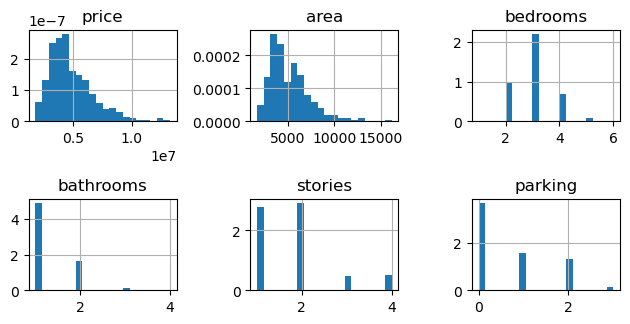

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [37]:
# Plot histograms for all numerical columns in the dataset
plt.figure(figsize=(12, 8))
house_data.select_dtypes(include=[np.number]).hist(bins=20, density=True, layout=(3, 3))
plt.tight_layout()
plt.show()
cat_cols

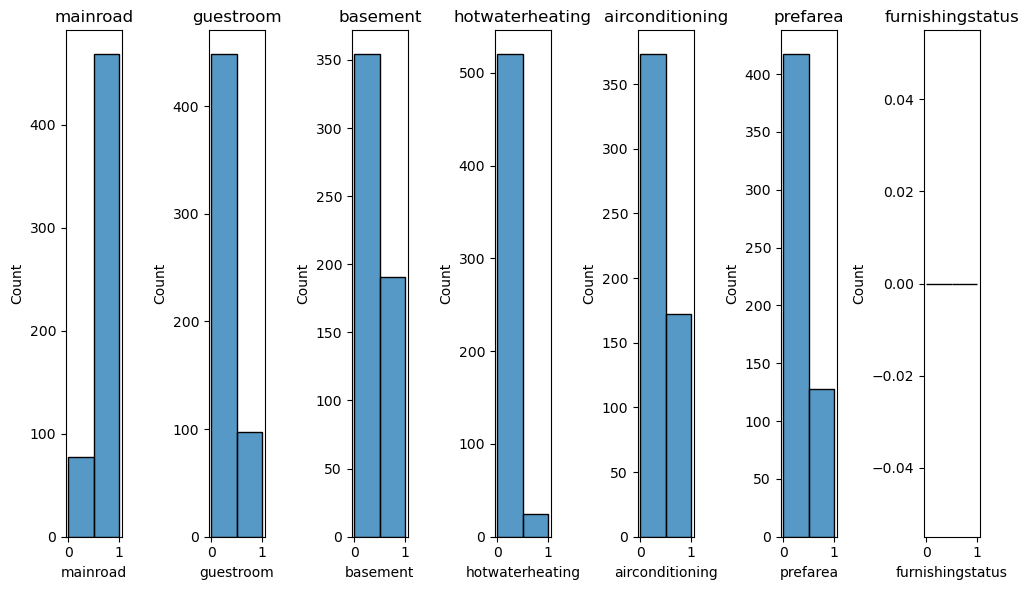

In [38]:

# Convert 'yes' and 'no' to 1 and 0
boolean_cols = ['mainroad', 'guestroom', 'basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']  # Replace with your boolean column names
for col in boolean_cols:
    house_data[col] = house_data[col].map({'yes': 1, 'no': 0})

# Plot histograms for boolean columns
plt.figure(figsize=(10, 6))

for col in boolean_cols:
    plt.subplot(1, len(boolean_cols), boolean_cols.index(col) + 1)
    sns.histplot(house_data[col], bins=2, kde=False)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [40]:
# checking the skewness and kurtosis
print("skewness is %f" % house_data["price"].skew())
print("Kurtosis is %f" % house_data["price"].kurt())

skewness is 1.212239
Kurtosis is 1.960130


### Getting the histogram of price column

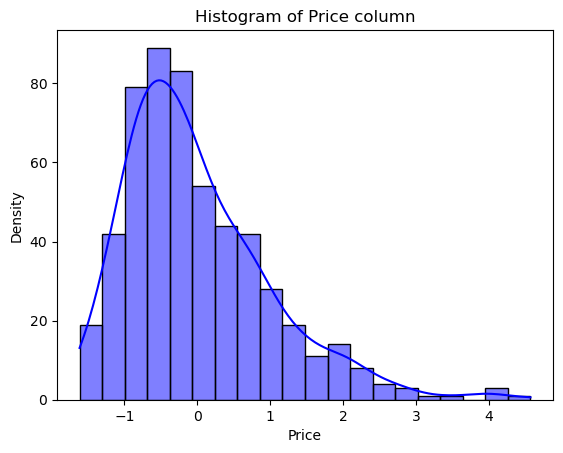

In [45]:
sns.histplot(data=house_data, x=house_data["price"], bins=20, kde=True, color='blue')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Histogram of Price column')
plt.show()

### Checking for outliers in the price data using boxplot

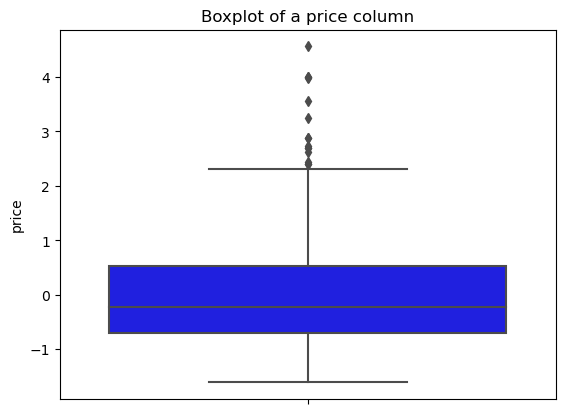

In [57]:
sns.boxplot(data=house_data, y=house_data["price"],  color='blue')
plt.ylabel('price')
plt.title('Boxplot of a price column')
plt.show()

# Bivariate Analysis

### let check for correlation between price and Area

In [54]:
house_data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,7420,4,2,3,1,0,0,0,1,2,1,NaN
1,4.004484,8960,4,4,4,1,0,0,0,1,3,0,NaN
2,4.004484,9960,3,2,2,1,0,1,0,0,2,1,NaN
3,3.985755,7500,4,2,2,1,0,1,0,1,3,1,NaN
4,3.554979,7420,4,1,2,1,1,1,0,1,2,0,NaN


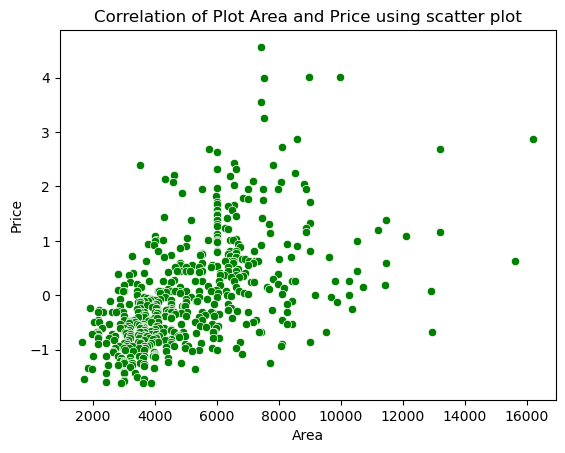

In [55]:
sns.scatterplot(data=house_data, x=house_data['area'], y=house_data['price'], color='green')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Correlation of Plot Area and Price using scatter plot')
plt.show()

### checking correlation using boxplot

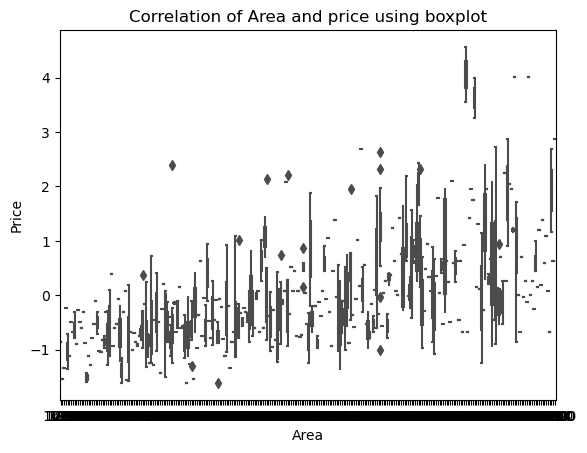

In [58]:
sns.boxplot(data=house_data, x=house_data["area"], y=house_data["price"],  color='blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Correlation of Area and price using boxplot')
plt.show()

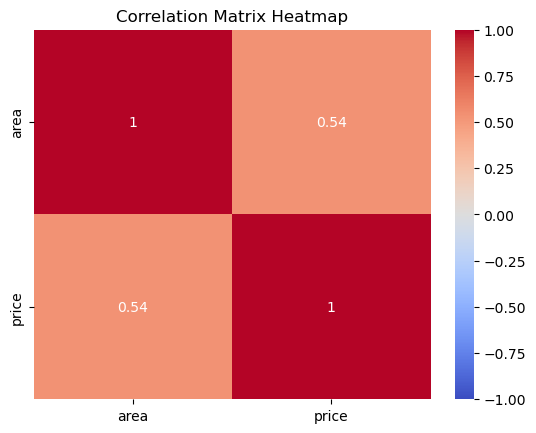

In [64]:

get_column = house_data[["area","price"]]
get_column
# Calculate the correlation matrix
correlation_matrix = get_column.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# MULTIVARIATE ANALYSIS

### Let's check the columns with the highest correlation

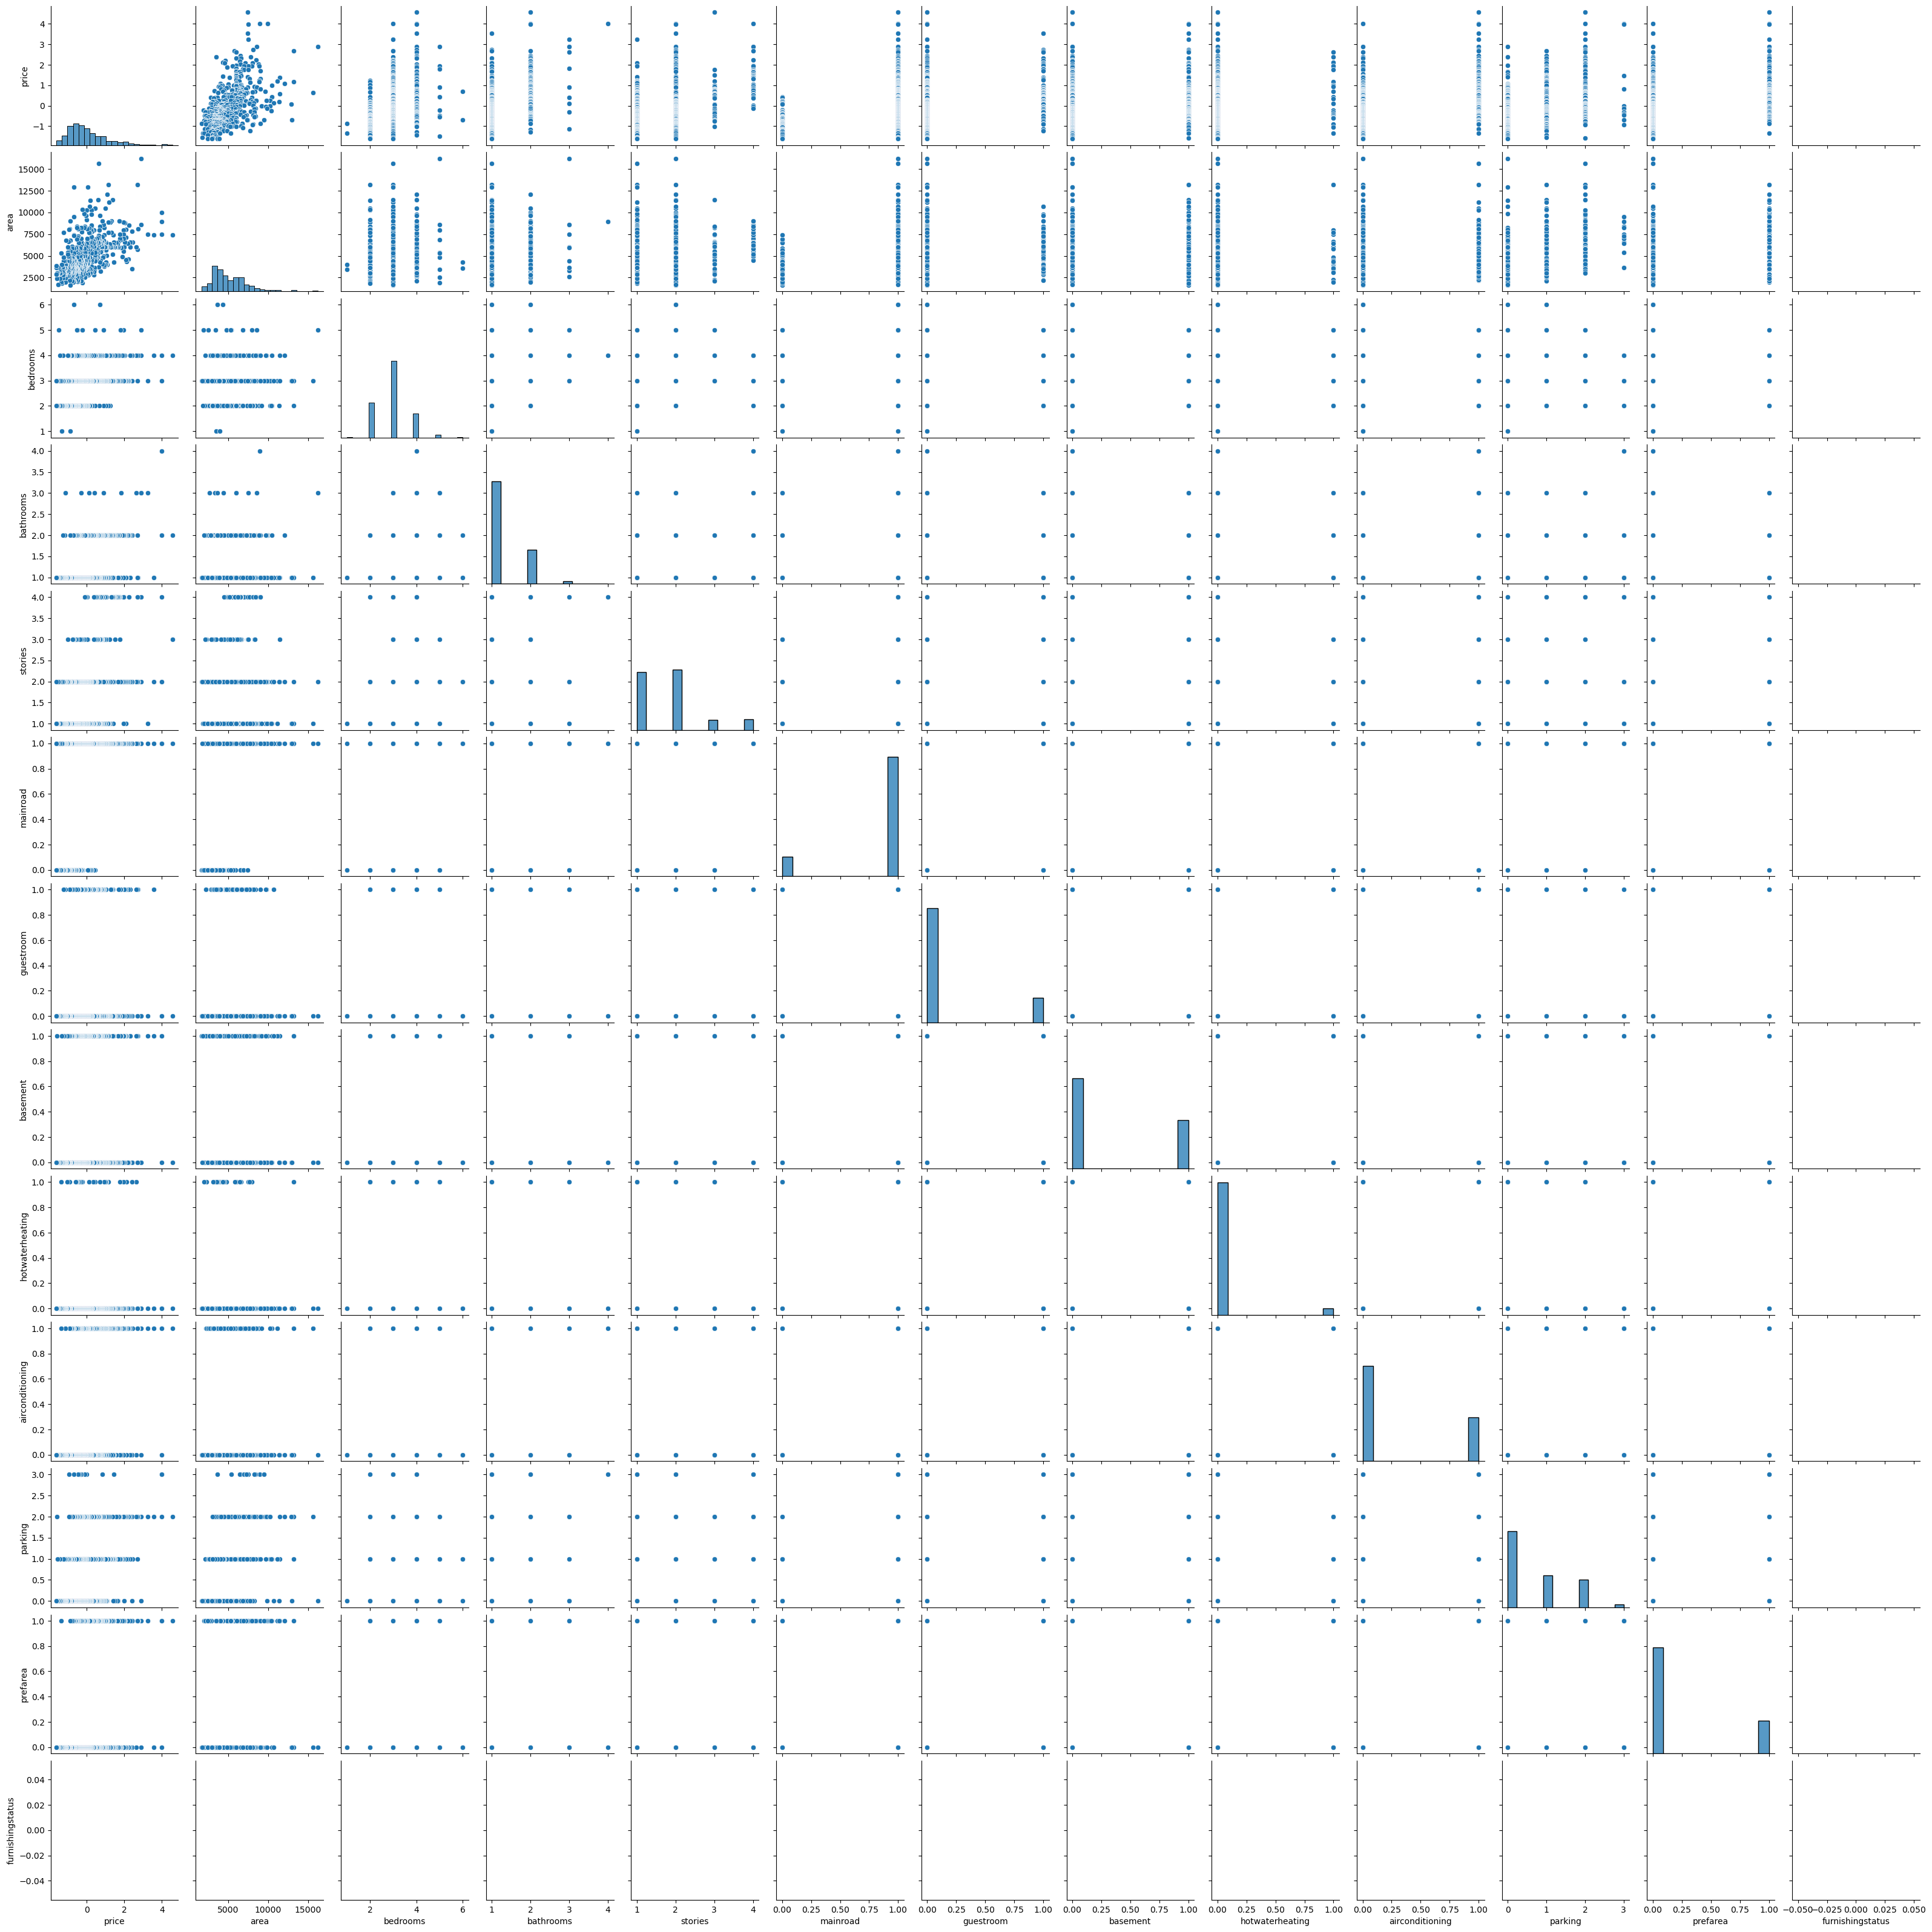

In [65]:
sns.pairplot(house_data)

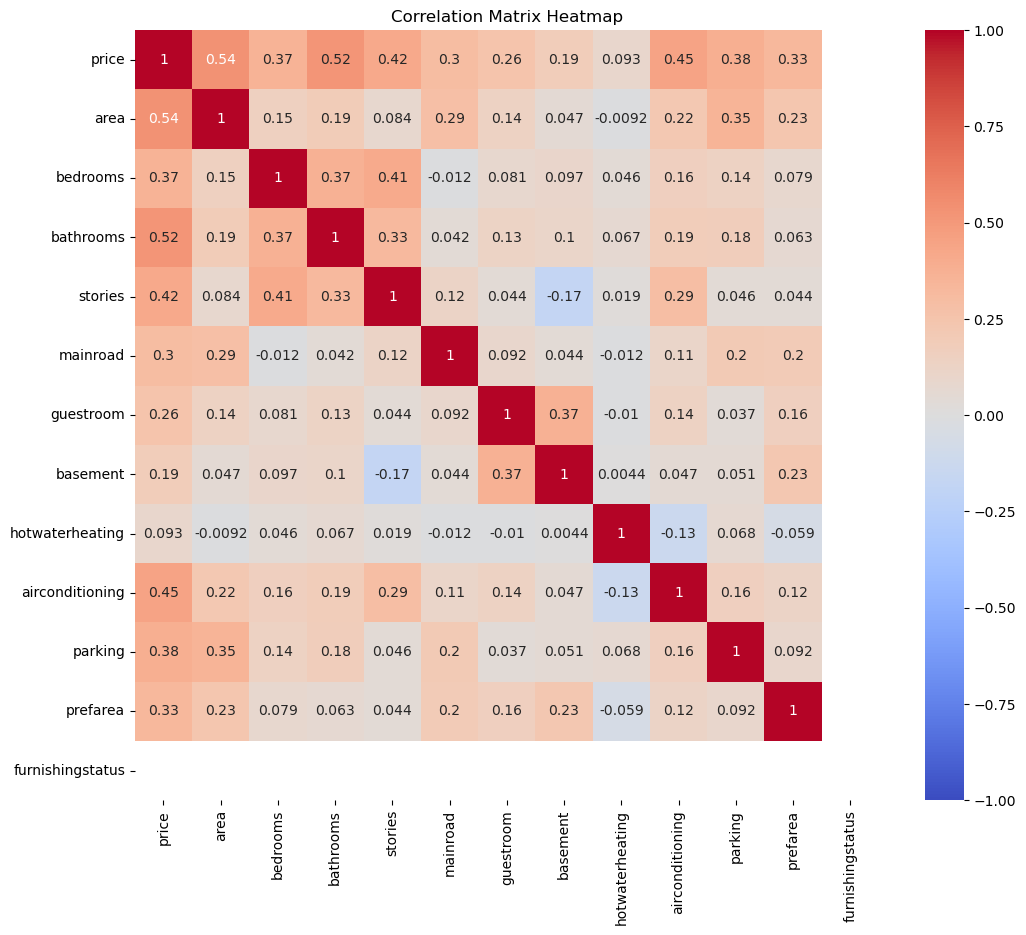

In [67]:

correlation_matrix = house_data.corr()
plt.figure(figsize=(12, 10))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# PROFILING OUR DATASET

In [71]:

from pandas_profiling import ProfileReport

profile = ProfileReport(house_data)
profile.to_file("profile_report.html")

C:\Users\EVERISTUS\AppData\Local\Temp\ipykernel_11992\2193152818.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]